<a href="https://colab.research.google.com/github/fakhar-iqbal/Machine_Learning_Fundamentals/blob/main/LinearAlgebra_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Eigen Decomposition**

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [ ]:
v = np.array([1,3])
v

array([1, 3])

In [ ]:
#plot vectors

def plot_vectors(vectors, colors):
  """
  plot onee or more vectors in 2d plane, specifying a color for each.

  Arguments
  ----------
  vectors: list of lists or arrays
          coordinates of vectors to plot. for ex [[1,2],[3,4]]
          contains two vectors to plot [1,2] [3,4]

  colors: list
         colors of vectors. for instance ['red','blue'] will display first vector in red and second in blue.

  example:
  plot_vectors([[1,2],[3,4]],['red','blue'])

  """

  plt.figure()
  plt.axvline(x=0,color='lightgrey')
  plt.axhline(y=0,color='lightgrey')

  for i in range(len(vectors)):
    x = np.concatenate([[0,0],vectors[i]])
    plt.quiver([x[0]],[x[1]],[x[2]],[x[3]],
               angles='xy',scale_units='xy',scale=1,color=colors[i],)


(-1.0, 5.0)

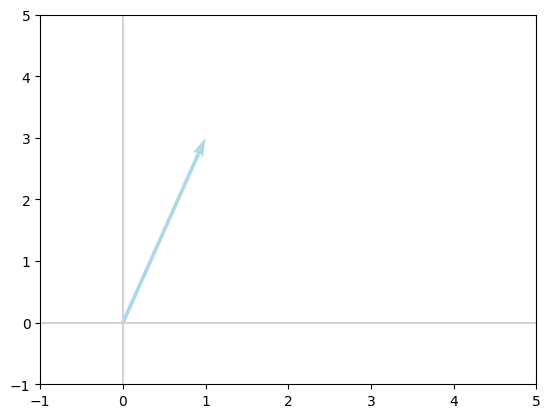

In [ ]:
plot_vectors([v],['lightblue'])

plt.xlim(-1,5)
plt.ylim(-1,5)


(-2.0, 15.0)

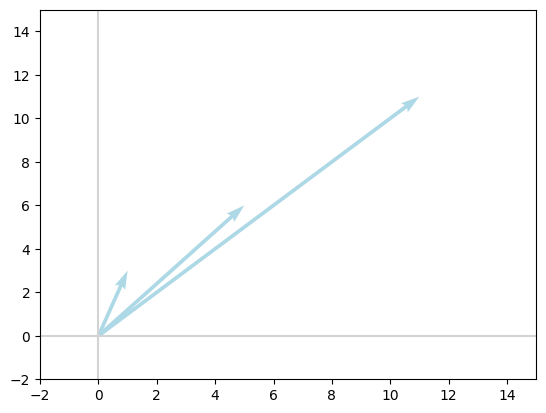

In [ ]:
plot_vectors([v,[5,6],[11,11]],['lightblue','lightblue','lightblue'])
plt.xlim(-2,15)
plt.ylim(-2,15)

In [ ]:
I = np.array([[1,0],[0,1]])
I

array([[1, 0],
       [0, 1]])

In [ ]:
Iv = np.dot(I,v)
Iv

array([1, 3])

In [ ]:
#matrix flipping over x-axis

E = np.array([[1,0],[0,-1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [ ]:
np.dot(E,v)

array([ 1, -3])

(-4.0, 4.0)

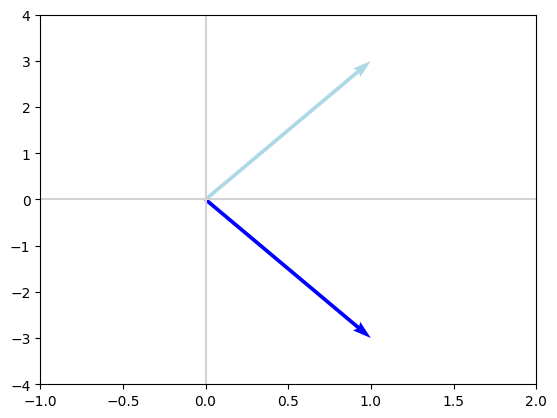

In [ ]:
plot_vectors([v,np.dot(E,v)],['lightblue','blue'])
plt.xlim(-1,2)
plt.ylim(-4,4)

In [ ]:
#flipping over y-axis
F = np.array([[-1,0],[0,1]])
F

array([[-1,  0],
       [ 0,  1]])

In [ ]:
Fv = np.dot(F,v)
Fv

array([-1,  3])

(-4.0, 4.0)

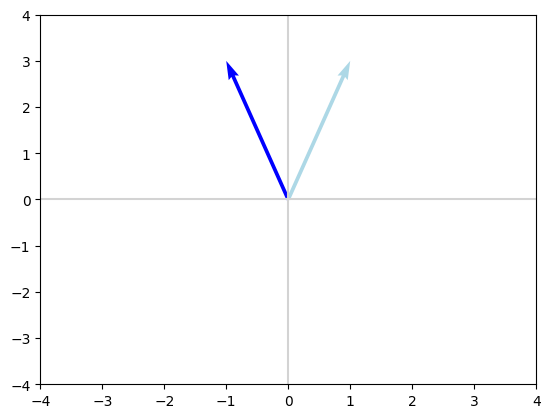

In [ ]:
plot_vectors([Fv,v],['blue','lightblue'])
plt.xlim(-4,4)
plt.ylim(-4,4)

###Applying a flipping matrix to vectors is an example of AFFINE transformation.
###A change in geometry that may adjust distances or angles between vectprs, but preseves parrallelism in them.

###other common affine transormations include:
###* Scaling (changing tge length of vectors)
###* SHearing
###* Rotation

## A single matrix can apply multiple affine transformations simultaneously.
## flipping over an axis and rotate over 45 dgrees

In [ ]:
A = np.array([[-1,4],[2,-2]])
A

array([[-1,  4],
       [ 2, -2]])

In [ ]:
Av = np.dot(A,v)
Av

array([11, -4])

(-8.0, 4.0)

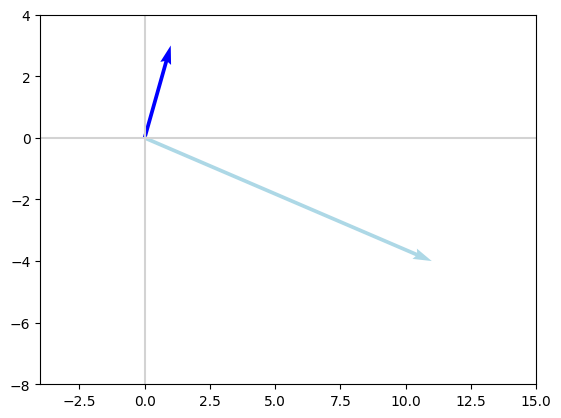

In [ ]:
plot_vectors([v,Av],['blue','lightblue'])
plt.xlim(-4,15)
plt.ylim(-8,4)

##we can concatinate several vectors together into a matrix.

In [ ]:
v = np.matrix([1,3])

In [ ]:
v

matrix([[1, 3]])

In [ ]:
v3 = np.array([-3,-1])
v4 = np.array([-1,1])

In [ ]:
#concatenate to make a matrix

V = np.concatenate((np.matrix(v).T,
                    np.matrix([2,1]).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                   axis=1)
V

matrix([[ 1,  2, -3, -1],
        [ 3,  1, -1,  1]])

In [ ]:
IV = np.dot(I,V)

In [ ]:
IV

matrix([[ 1,  2, -3, -1],
        [ 3,  1, -1,  1]])

In [ ]:
I

array([[1, 0],
       [0, 1]])

In [ ]:
AV = np.dot(A,V)
AV

matrix([[11,  2, -1,  5],
        [-4,  2, -4, -4]])

In [ ]:
def vectorify(mtrx,col):
  return np.array(mtrx[:,col]).reshape(-1)

In [ ]:
vectorify(V,0)

array([1, 3])

(-6.0, 6.0)

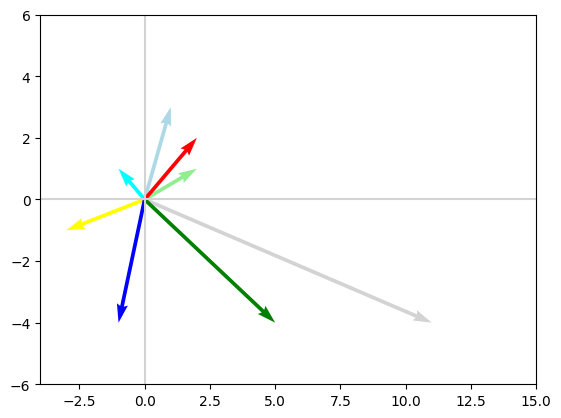

In [ ]:
plot_vectors([vectorify(V,0),vectorify(V,1),vectorify(V,2),vectorify(V,3),
              vectorify(AV,0),vectorify(AV,1),vectorify(AV,2),vectorify(AV,3)],
             ['lightblue','lightgreen','yellow','cyan','lightgrey','red','blue','green'])

plt.xlim(-4,15)
plt.ylim(-6,6)

#**Eigen vectors and Eignvalues**

An eigenvector is a special vector v such that when it is transformed by some matrix, the prodcut Av, has the excact same direction.

An eigenvalue is a scalar that simply scales the eigenvector v such that the eq satisfies:
Av = lambda v



In [ ]:
A = np.array([[-1,4],[2,-2]])
A

array([[-1,  4],
       [ 2, -2]])

eig() returns:
* a vector of eigenvalues
* a matrix of eigenvectors

In [ ]:
lambdas, V = np.linalg.eig(A)
lambdas,V

(array([ 1.37228132, -4.37228132]),
 array([[ 0.86011126, -0.76454754],
        [ 0.51010647,  0.64456735]]))

The matrix contains as many eigenvectors as there are columns in A

In [ ]:
V #each column is a separate eigenvector

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

With corresponding eigenvalue

In [ ]:
lambdas

array([ 1.37228132, -4.37228132])

lets confirm Av=lambda.v

In [ ]:
v = V[:,0]
v

array([0.86011126, 0.51010647])

In [ ]:
Av = np.dot(A,v)
Av

array([1.18031462, 0.70000958])

In [ ]:
np.dot(A,v) == np.dot(lambdas[0],v)

array([ True,  True])

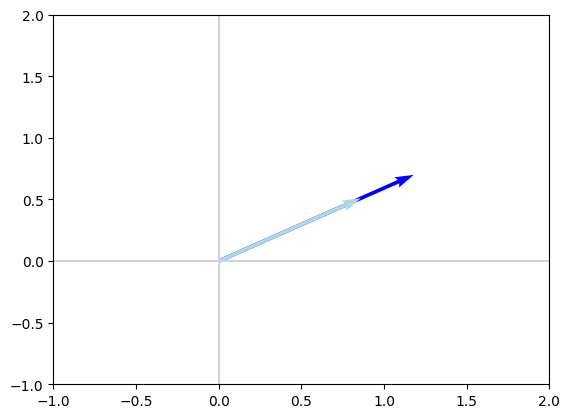

In [ ]:
plot_vectors([Av,v],['blue','lightblue'])
plt.xlim(-1,2)
_=plt.ylim(-1,2)

In [ ]:
v2  = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [ ]:
Av2 = np.dot(A,v2)
Av2

array([ 3.34281692, -2.81822977])

(-4.0, 4.0)

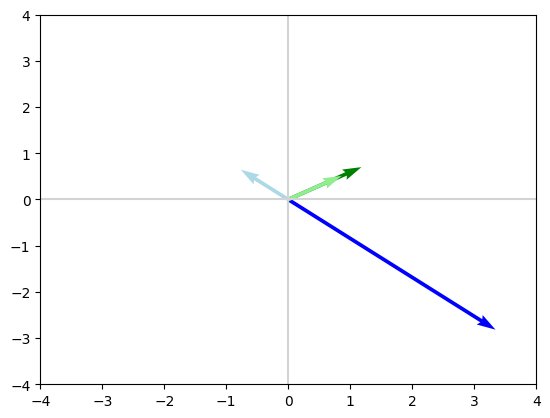

In [ ]:
plot_vectors([Av2,v2,Av,v],['blue','lightblue','green','lightgreen'])
plt.xlim(-4,4)
plt.ylim(-4,4)

In [ ]:
#pytorch implementation

A_pt= torch.tensor([[-1,4],[2,-2.]])
A_pt

tensor([[-1.,  4.],
        [ 2., -2.]])

In [ ]:
L,V = torch.linalg.eig(A_pt)
Lr = L.real
Vr = V.real

In [ ]:
v_p = Vr[:,0]
v_p

tensor([0.8601, 0.5101])

In [ ]:
A_ptv = torch.matmul(A_pt,v_p)
A_ptv

tensor([1.1803, 0.7000])

(-1.0, 2.0)

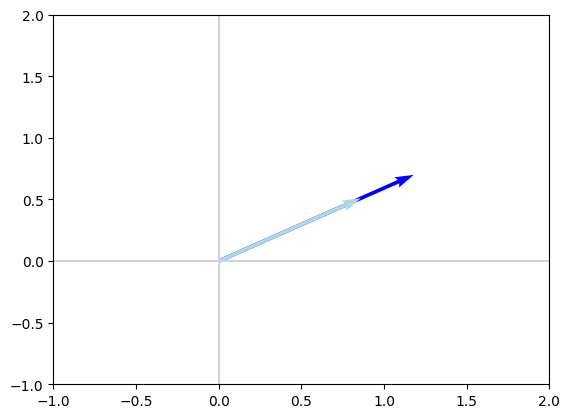

In [ ]:
plot_vectors([A_ptv,v_p],['blue','lightblue'])
plt.xlim(-1,2)
plt.ylim(-1,2)

In [ ]:
v_p2 = Vr[:,1]
v_p2

tensor([-0.7645,  0.6446])

In [ ]:
A_vp2 = torch.matmul(A_pt,v_p2)
A_vp2

tensor([ 3.3428, -2.8182])

(-4.0, 3.0)

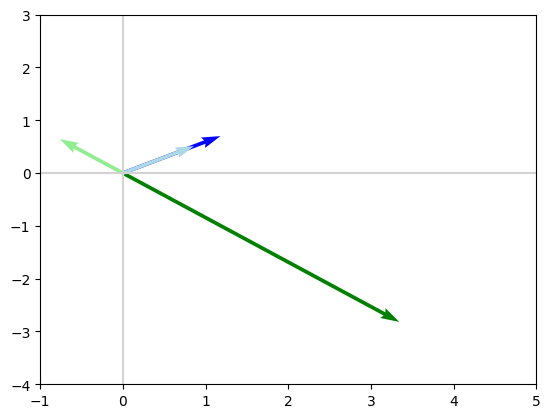

In [ ]:
plot_vectors([A_vp2.numpy(),v_p2,A_ptv,v_p],['green','lightgreen','blue','lightblue'])
plt.xlim(-1,5)
plt.ylim(-4,3)

#**EigenVectors in >2D**

In [ ]:
X = np.array([[25,2,9],[5,26,-5],[3,7,-1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [ ]:
lambdas_X, V_X = np.linalg.eig(X)
lambdas_X,V_X

(array([29.67623202, 20.62117365, -0.29740567]),
 array([[-0.71175736, -0.6501921 , -0.34220476],
        [-0.66652125,  0.74464056,  0.23789717],
        [-0.22170001,  0.15086635,  0.90901091]]))

In [ ]:
np.dot(X,V_X[:,0])

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [ ]:
lambdas_X[0]*V_X[:,0]

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [ ]:
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [ ]:
X = torch.tensor(X)

In [ ]:
X = torch.tensor([[25,2,9],[5,26,-5],[3,7,-1.]])

In [ ]:
L,V = torch.linalg.eig(X)
L = L.real
V = V.real
L,V

(tensor([29.6762, 20.6212, -0.2974]),
 tensor([[ 0.7118,  0.6502, -0.3422],
         [ 0.6665, -0.7446,  0.2379],
         [ 0.2217, -0.1509,  0.9090]]))

In [ ]:
######### first vector

v1 = V[:,0]
v2= V[:,1]
v3  = V[:,2]


In [ ]:
Xv1 = torch.matmul(X,v1)
Xv2 = torch.matmul(X,v2)
Xv3 = torch.matmul(X,v3)


In [ ]:
Xv1

tensor([21.1223, 19.7798,  6.5792])

In [ ]:
L[0] * v1

tensor([21.1223, 19.7798,  6.5792])

In [ ]:
Xv2

tensor([ 13.4077, -15.3554,  -3.1110])

In [ ]:
L[1]*v2

tensor([ 13.4077, -15.3554,  -3.1110])

In [ ]:
Xv3

tensor([ 0.1018, -0.0708, -0.2703])

In [ ]:
L[2]*v3

tensor([ 0.1018, -0.0708, -0.2703])

#**Matrix Determinants**

In [ ]:
A = np.array([[1,2],[4,4]])
np.linalg.det(A)

-4.0

(-1.0, 4.0)

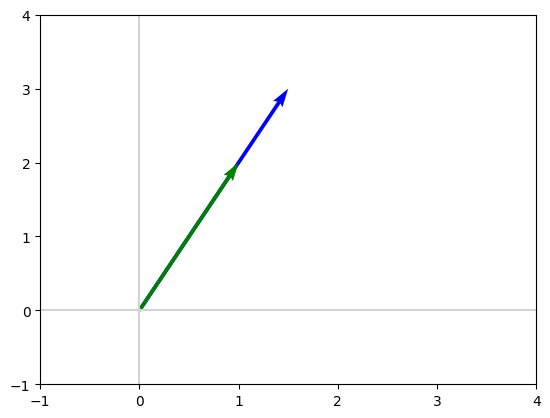

In [ ]:
plot_vectors([np.array([1.5,3]),np.array([1,2])],['blue','green'])
plt.xlim(-1,4)
plt.ylim(-1,4)

In [ ]:
Apt = torch.tensor([[1,2],[1.5,3]])
Apt

tensor([[1.0000, 2.0000],
        [1.5000, 3.0000]])

In [ ]:
torch.det(Apt)

tensor(-0.)

In [ ]:
torch.linalg.inv(Apt) #singular matrix since the columns are lniearly dependant

_LinAlgError: linalg.inv: The diagonal element 2 is zero, the inversion could not be completed because the input matrix is singular.

In [ ]:
A = np.array([[1,2,4],[2,-1,3],[0,5,1]])
A

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [ ]:
np.linalg.det(A)

19.999999999999996

#**Determinants and Eigenvalues**

##Determinant of a matrix is product of all eignevalues of that matrix

In [ ]:
L,V=torch.linalg.eig(Apt)
L.real

tensor([0., 4.])

In [ ]:
L,V = np.linalg.eig(A)
L

array([-3.25599251, -1.13863631,  5.39462882])

In [ ]:
np.product(L)

19.99999999999999

##Lets use a mtrix B, basis vectors to explore the impact of applying matrices with varying dets.

In [ ]:
B = np.array([[1,0],[0,1]])
B

array([[1, 0],
       [0, 1]])

In [ ]:
def vectorfy(matrx,cols):
  return np.array(matrx[:,cols]).reshape(-1)

In [ ]:
vectorfy(B,0)

array([1, 0])

(-1.0, 2.0)

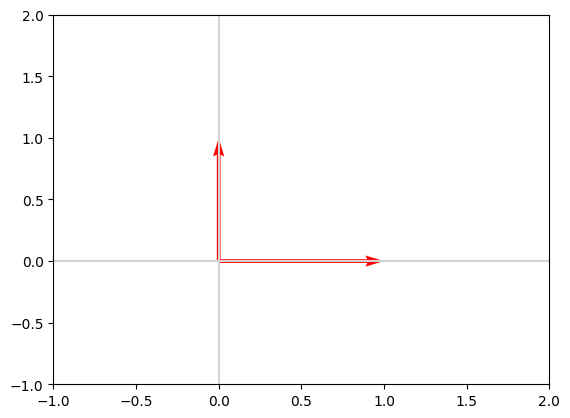

In [ ]:
plot_vectors([vectorfy(B,0),vectorfy(B,1)],['red','red'])
plt.xlim(-1,2)
plt.ylim(-1,2)

In [ ]:
# lets start applying matrices to B

A = np.array([[-4,1],[-8,2]])


In [ ]:
np.linalg.det(A)

0.0

In [ ]:
NB = np.dot(A,B)
NB

array([[-4,  1],
       [-8,  2]])

(-9.0, 3.0)

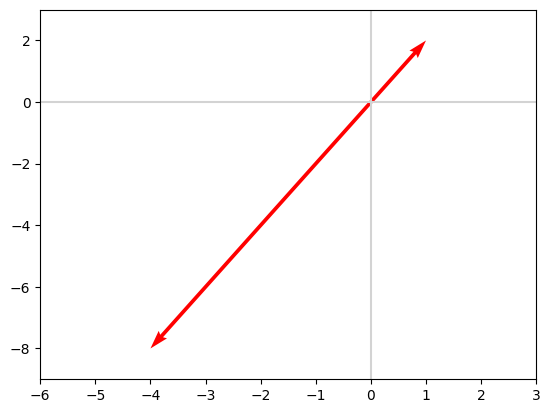

In [ ]:
plot_vectors([vectorfy(NB,0),vectorfy(NB,1)],['red','red'])
plt.xlim(-6,3)
plt.ylim(-9,3)

##Since the both vectors are exactly opposite, the dont make yp the volume

In [ ]:
L,V = np.linalg.eig(NB)
L,V

(array([-2.,  0.]),
 array([[-0.4472136 , -0.24253563],
        [-0.89442719, -0.9701425 ]]))

##if anyone of the matrix eigenvalue is zero, then the prodcut of the eigenvalues must be zero and the determinant must also be zero

In [ ]:
np.linalg.det(NB)

0.0

##Lets apply I2 to B

In [ ]:
I = np.array([[1,0],[0,1]])
I

array([[1, 0],
       [0, 1]])

In [ ]:
IB = np.dot(I,B)

In [ ]:
IB

array([[1, 0],
       [0, 1]])

In [ ]:
J = np.array([[-0.5,0],[0,2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [ ]:
JB = np.dot(J,B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [ ]:
L,V = np.linalg.eig(JB)
L,V

(array([-0.5,  2. ]),
 array([[1., 0.],
        [0., 1.]]))

In [ ]:
np.product(L)

-1.0

In [ ]:
np.linalg.det(JB)

-1.0

(-1.0, 2.0)

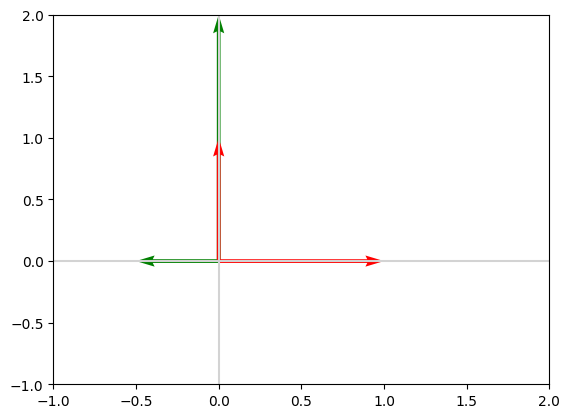

In [ ]:
plot_vectors([vectorfy(JB,0),vectorfy(JB,1),vectorfy(B,0),vectorfy(B,1)],['green','green','red','red'])
plt.xlim(-1,2)
plt.ylim(-1,2)

In [ ]:
D = I*2

In [ ]:
D

array([[2, 0],
       [0, 2]])

In [ ]:
DB = np.dot(D,B)
DB

array([[2, 0],
       [0, 2]])

(-1.0, 3.0)

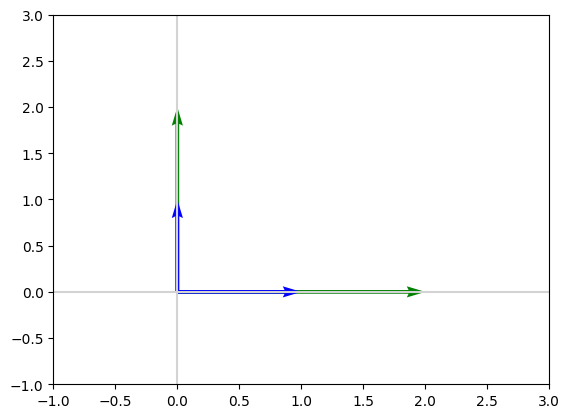

In [ ]:
plot_vectors([vectorfy(DB,0),vectorfy(DB,1),vectorfy(B,0),vectorfy(B,1)],['green','green','blue','blue'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [ ]:
np.linalg.eig(DB)

(array([2., 2.]),
 array([[1., 0.],
        [0., 1.]]))

##**Eigen Decompostion**
##The eigne decomposition of matrix A is :     A = V .^. Vinv
##where:
* V is the concatination of all eigenvectors of A
* uppr case lambda .^. is the diagonal matrix diag(lambda). Note that the convention is to arrange the lambda values in descending order; as a reult
the first eigenvalue (and its associated eigenvector) may be a primary characteristics of A

In [69]:
A = np.array([[4,2],[-5,-3]])
A

array([[ 4,  2],
       [-5, -3]])

In [70]:
L,V = np.linalg.eig(A)


In [71]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [72]:
L

array([ 2., -1.])

In [73]:
lambd = np.diag(L)
lambd

array([[ 2.,  0.],
       [ 0., -1.]])

In [74]:
np.dot(V,np.dot(lambd,Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

In [75]:
A

array([[ 4,  2],
       [-5, -3]])

## Eigen Decomposition is not possible with all matrices, and in some cases where it is possible, the eigen decomposition involves complex numbers instead of straightforward real numbers.

##In machine learning,however, we are orking with real symmetric metrics, which can be conviniently and efficiently decpmosed to real-only eigenvectors adn real-only eigenvalues.

##A = Q.^. Qinv
## where Q is analogous to V perviously, but its special because its orthogonal matrix

In [76]:
A= np.array([[2,1],[1,2]])
A

array([[2, 1],
       [1, 2]])

In [78]:
L,Q = np.linalg.eig(A)

In [80]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [81]:
np.dot(Q[:,0],Q[:,1])

0.0

In [82]:
L

array([3., 1.])

In [83]:
lamb = np.diag(L)
lamb

array([[3., 0.],
       [0., 1.]])

In [84]:
np.dot(Q,np.dot(lamb,Q.T))

array([[2., 1.],
       [1., 2.]])

In [85]:
np.dot(Q,Q.T)

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])

In [86]:
np.dot(Q.T,Q)

array([[1.00000000e+00, 2.23711432e-17],
       [2.23711432e-17, 1.00000000e+00]])

###Pytorch implem.

In [89]:
P = torch.tensor([[25,2,-5],[3,-2,1],[5,7,4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [90]:
L,V = torch.linalg.eig(P)
L = L.real
V = V.real
L,V

(tensor([23.7644,  6.6684, -3.4328]),
 tensor([[ 0.9511, -0.2386,  0.1626],
         [ 0.1218, -0.1924, -0.7705],
         [ 0.2837, -0.9519,  0.6163]]))

In [91]:
Lambda = torch.diag(L)
Lambda

tensor([[23.7644,  0.0000,  0.0000],
        [ 0.0000,  6.6684,  0.0000],
        [ 0.0000,  0.0000, -3.4328]])

In [92]:
Vinv = torch.linalg.inv(V)

In [93]:
np.dot(V,np.dot(Lambda,Vinv))

array([[24.999989 ,  1.9999988, -4.999999 ],
       [ 2.9999988, -2.       ,  1.0000006],
       [ 4.9999976,  6.999998 ,  4.0000005]], dtype=float32)